<a href="https://colab.research.google.com/github/JavierMarin24/ADA-Informes/blob/main/Informe%207%20Corte%20de%20Varillas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de Optimización**

Los problemas de optimización son de los más comunes que se pueden encontrar en cualquier tipo de trabajo. Estos buscan la máxima eficiencia para la resolución de problemas, en otras palabras, maximizan o minimizan el valor de una función.

El problema planteado en este informe es el de buscar la máxima ganancia que se puede obtener al cortar una varilla donde la medida de cada corte tiene un valor(precio) establecido.

A continuación se presentan la entrada y salida esperada para este problema:

Entrada: largo $n$ de la varila y una lista P con los precios respectivos según el largo del corte i donde $1<=i<n$. 


Salida:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

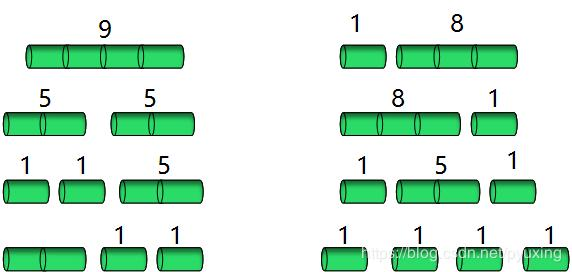

# **2. Descripción del Algoritmo**

### **2.1 Resolviendo mediante Programación Dinámica**

Paso 1: Se recibe la lista de precios por medida de la varilla y el largo de esta.

Paso 2: Creación del vector para registrar los datos de los subproblemas que se irán resolviendo de menor a mayor tamaño.

Paso 3: Se comienza resolviendo el problema más pequeño encontrando su solución más óptima y guardandola en el vector de resultados de los subproblemas. Se repite esto aumentando en cada iteración el tamaño de la barra en 1 pero a diferencia del método "divide y vencerás", no necesitará resolver los subproblemas resueltos anteriormente ya que la solución óptima de aquellos subproblemas repetidos se encuentra almacenada en el vector mencionado en el paso 2.

Paso 4: Posterior a encontrar la solución más óptima para el problema del tamaño ingresado por el usuario, se retorna la posición n ingresada por el usuario del vector que almacena las soluciones óptimas de cada subproblema.




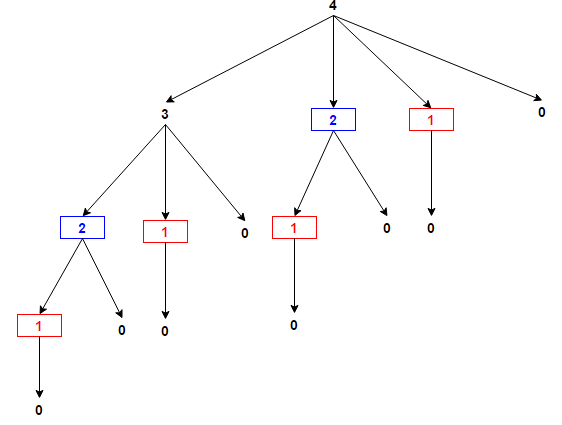

### **2.1.1 Código con Programación Dinámica**

In [2]:
def corteVarillas(arrayPrecios , n, verbose):
  global subproblemas
  r=[0 for x in range(n+1)] #vector que guarda la solución optima de cada subproblema
  r[0] = 0
  
  for i in range(1,n+1):
    maxValor = float("-inf") #menos infinito
    #se recorren las posibles soluciones hasta enncontrar la óptima
    for j in range(i):
      maxValor = max(maxValor, arrayPrecios[j]+r[i-j-1]) 
      subproblemas = subproblemas + 1
    if(verbose == True):
      print("La máxima ganancia obtenible en una varilla de ", i+1," de largo es: ",maxValor)  
    
  
    r[i] = maxValor #se asgina la mejor solución encontrada
  if (verbose == True):
    print("La ganancia máxima es: ", maxValor)
  return r[n]

array = [1, 5, 8, 9, 10, 17, 17, 20]
subproblemas = 0
print("La ganancia máxima es:",corteVarillas(array, 8,False))
print("La cantidad de subproblemas resueltos es:",subproblemas)


La ganancia máxima es: 22
La cantidad de subproblemas resueltos es: 36


### **2.1.2 Implementación Verbose Programación Dinámica**

In [3]:
array = [1,5,8,9,10,17,17,20]
subproblemas = 0
a = corteVarillas(array,8,True)

La máxima ganancia obtenible en una varilla de  2  de largo es:  1
La máxima ganancia obtenible en una varilla de  3  de largo es:  5
La máxima ganancia obtenible en una varilla de  4  de largo es:  8
La máxima ganancia obtenible en una varilla de  5  de largo es:  10
La máxima ganancia obtenible en una varilla de  6  de largo es:  13
La máxima ganancia obtenible en una varilla de  7  de largo es:  17
La máxima ganancia obtenible en una varilla de  8  de largo es:  18
La máxima ganancia obtenible en una varilla de  9  de largo es:  22
La ganancia máxima es:  22


### **2.2 Resolviendo mediante Método Recursivo**

Paso 1: Se recibe la lista de precios por medida de la varilla y el largo de esta.

Paso 2: Se establece el caso base (fin de recursión) cuando $n=0$.

Paso 3: Por cada tamaño de varilla, se resuelven todas las combinaciones posibles de tamaño de varilla para buscar el precio máximo. Esto se repite para todos los tamaños de varilla, volviendo a resolver en cada iteración los problemas que ya fueron resueltos anteriormente, algo que no es óptimo.

Paso 4: Posterior a resolver todas las combinaciones, se retorna la máxima ganancia encontrada para la varilla de largo $n$.



### **2.2.1 Código Método Recursivo**

In [4]:
import math
from termcolor import colored

def CutRod(precios, n, verbose = False):
  global contsubproblemas
  # Caso Base
  if(n <= 0):
    if (verbose == True):
      print("Caso base (largo == 0)\n")      
    return 0
  # Q almacena la mayor ganacia
  maxValor = -math.inf   

  # Se recorre el largo de la barra
  for i in range(n):
    contsubproblemas += 1
    corte = precios[i] + CutRod(precios, n - i - 1) 
    if (verbose == True):
      print("El mejor corte en", i+1,"es: ", corte, "\n")  
    #se obtiene el maxValor
    maxValor = max(maxValor, corte)
  # Retornamos el valor de maxima ganancia
  if (verbose == True):
    print("La ganancia máxima es: ", maxValor)
  return maxValor

a = [1, 5, 8, 9, 10, 17, 17, 20]
contsubproblemas = 0
corte = [0] * (len(a) + 1)
maxValor = CutRod(a, len(a), False) 
print("La ganancia máxima es: ", maxValor)
print("Cantidad de llamadas recursivas:", contsubproblemas)

La ganancia máxima es:  22
Cantidad de llamadas recursivas: 255


### **2.2.2 Implementación Verbose Método Recursivo**

In [5]:
array = [1,5,8,9,10,17,17,20]
contsubproblemas = 0
a = CutRod(array,8,True)
print("La cantidad de llamadas recursivas es: ", contsubproblemas)


El mejor corte en 1 es:  19 

El mejor corte en 2 es:  22 

El mejor corte en 3 es:  21 

El mejor corte en 4 es:  19 

El mejor corte en 5 es:  18 

El mejor corte en 6 es:  22 

El mejor corte en 7 es:  18 

El mejor corte en 8 es:  20 

La ganancia máxima es:  22
La cantidad de llamadas recursivas es:  255


### **2.3 Ejemplo**

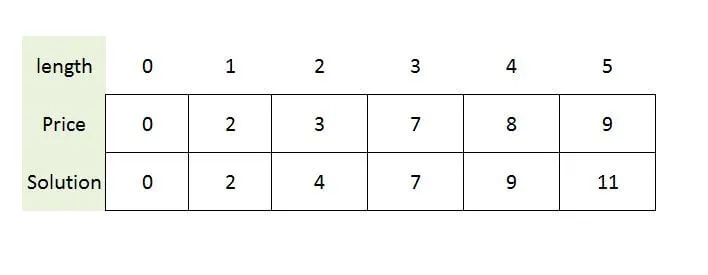

Como se muestra en la imagen, se tiene una lista de precio $Price[2,3,7,8,9]$ y además abajo se muestra el vector resultante de calcular las soluciones óptimas para cada subproblema de tamaño $n$ en el intervalo $[1,5]$.

Paso 1: Se tiene una varilla de largo $n=1$ por lo que existe un único corte posible de largo 1 por lo que la solución óptima o máxima ganancia para esta varilla es $Price[1]$, este resultado se copia en $Solution[1]$ y así no se tendrá que resolver este subproblema en los pasos siguientes.

Paso 2: Se tiene una varilla de largo $n=i$ con $i>1$ por lo que se requiere de calcular la ganancia que podrían generarse con todas la combinaciones de cortes posibles, a excepción de los cortes cuya solución óptima ya haya sido registrada en el vector $Solution$ donde ya se tiene almacenado la ganancia máxima de $i-1$ tamaños de varilla.

Paso 3: Se retorna el valor correspondiente a la ganancia máxima de una varilla de largo $n$ el cual es indicado por el usuario. El valor que se retorna corresponde al almacenado en $Solution[n]$. Por ejemplo si se ingresa un $n=4$, la ganancia máxima retornada corresponderá a $Solution[4] = 9$. 



# **3. Tiempo de Ejecución**

### **3.1 Teorema**

El corte de varillas mediante el método de Bottom up corresponde a $O(n^2)$.

### **3.1.1 Prueba del Teorema**

El algoritmo ejecuta las siguientes instrucciones las cuales se utilizarán para el cálculo del tiempo de ejecución del algoritmo:

Encontrar las soluciones para cada subproblema generado por una varilla de largo $n$ posee un tiempo $O(n)$.

Retorno del máximo $r_n$ que se puede obtener de cada sub-problema cortando la varilla y vendiendo las partes posee un tiempo $O(1)$ ya que se accede a una posición especifica del arreglo.

Además de estas instrucciones, la cantidad de subproblemas corresponde a $n^2$ por lo que se le otorga un tiempo de $O(n^2)$.

A partir de estos datos, se puede obtener el tiempo de ejecución del algoritmo mediante la forumla: 

$T(n) = f(n) + g(n) + h(n)$

$f(n)$: cantidad de subproblemas a resolver
$g(n)$: tiempo de resolución de cada sub-problema
$H(n)$: tiempo de reconstrucción de la solución final.

Entonces se obtiene que: 
$T(n) = O(n^2) + O(1) + O(n) → T(n) = O(n^2)$



### **3.2 Complejidad Espacial**

### **3.2.1 Teorema**

El corte de varillas posee una complejidad espacial $O(n)$.


## **3.2.2 Prueba del Teorema**

El algoritmo trabaja princpalmente con 3 arreglos:

Arreglo de entrada: Arreglo $P[n]$ que contiene los precios respectivos de cada corte.

Arreg

# **4. Correctitud**

4.1 Correctitud Corte de Varillas (bottom-up)

El algoritmo Corte de varillas retorna correctamente la ganancia máxima $r_n$ que se puede obtener al dividir una carilla de largo $n$ y vender sus partes.

**4.2 Prueba del Teorema**

Para demostrar la correctitud del algoritmo, demostraremos la hipótesis $P(n)$ utilizando inducción.

**Caso base**

Para $n = 1$, el algoritmo retorna el precio para una varilla de largo 1. Puesto que este es el tamaño mínimo que puede tener una varilla, esta no puede dividirse, y por lo tanto, existe un único caso para el valor de $r_n$

**Paso inductivo**

Para $n > 1$, se calcula la ganancia $r_{n}(j)$ para $j = 1..n$, donde $j$ corresponde al tamaño de todos los posibles subproblemas en que puede dividirse el problema original. La función $r_{n}(j)$ puede expresarse con la fórmula:

$r_{n}(j) = P_{j} + r_{n-j}$,

donde $P_{j}$ corresponde al precio de una varilla de largo $j$, y $r_{n-j}$ es la ganancia máxima para una varilla de largo $n-j$.

Observemos que, por el paso inductivo, sabemos que la ganancia máxima para cualquier varilla de largo $n-j$, con $j \geq 1$, será calculada correctamente.

Al finalizar el algoritmo, se retorna el valor $r_n$ máximo de todos los valores obtenidos por la función $r_n(j)$. Puesto que la función $r_n(j)$ considera todos los subproblemas posibles que resultan al dividir el problema original, sabemos que uno de estos valores será el que maximice la solución buscada.

Como la hipótesis $P(n)$ se cumple para el **caso base** y para el **paso inductivo**, queda demostrada la correctitud del algoritmo Corte de Varillas.




# **5. Experimentos**

### **5.1 Tiempo de ejecución Recursivo v/s Dinámico**

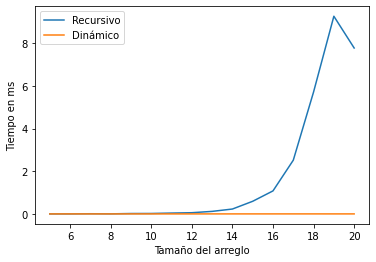

In [6]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

# Función brindada por el profesor.
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A
  
x=[]; y=[]
y1=[]
for n in range(5,21):

  a = cutrod_instance_generator(n)
  contsubproblemas = 0
  subproblemas = 0
  verbose = False
  #la función repeat está ejecutando 20 veces cutting rod con el arreglo a y retorna el mejor tiempo obtenido.
  t1 = repeat(setup="from __main__ import CutRod", stmt=f"CutRod({a},{n},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import corteVarillas", stmt=f"corteVarillas({a},{n},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Recursivo", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **5.1.1 Análisis de Resultados**

Como se observa en la imagen el método recursivo es mucho más lento que el método dinámico. Cabe destacar que a pesar de que el método dinámico posee un tiempo cuadrático $O(n^2)$ , este se muestra como si fuese lineal ya que el método recursivo genera muchisimas llamadas recursivas por lo que esta gran diferencia hace ver al método dinámico como si fuese lineal.

A continuación se muestra una gráfica representativa del tiempo de ejecución del Corte de varillas dinámico.

### **5.1.2 Tiempo de ejecución Corte de Varillas Dinámico**

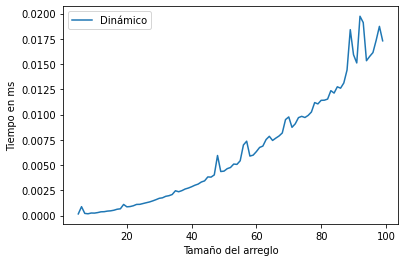

In [19]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

# Función brindada por el profesor.
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A
  
x=[]; y=[]

for n in range(5,100):

  a = cutrod_instance_generator(n)
  contsubproblemas = 0
  subproblemas = 0
  verbose = False
  #la función repeat está ejecutando 20 veces cutting rod con el arreglo a y retorna el mejor tiempo obtenido.
  t1 = repeat(setup="from __main__ import corteVarillas", stmt=f"corteVarillas({a},{n},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  


plt.plot(x, y)

plt.legend(["Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **5.1.3 Análisis de Resultados**

Como se aclaró anteriormente y por lo mostrado en esta gráfica, el tiempo de ejecución de corte de varillas mediante método dinámico es cuadrático, acorde a lo explicado en el punto 3 de este informe donde se indica que el tiempo de Cuting Rod es de orden $O(n^2)$.

### **5.2 Cantidad de subproblemas método dinámico**

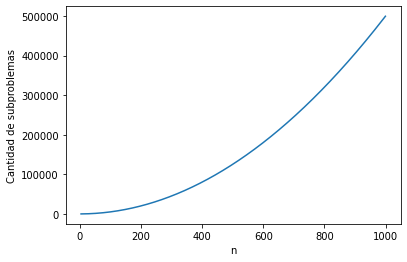

In [8]:
import matplotlib.pyplot as plt
import random

x = []; y = []; 

for n in range(5,1000):
  a = cutrod_instance_generator(n)
  subproblemas = 0
  corteVarillas(a,n,verbose = False)
  x.append(n)
  y.append(subproblemas)

plt.plot(x,y)

plt.xlabel('n')
plt.ylabel('Cantidad de subproblemas')
plt.show()

### **5.2.1 Análisis de Resultados**

Se obtiene del gráfico anterior que a medida que aumenta el tamaño de la varilla que se quiere cortar, la cantidad de subproblemas a resolver aumenta exponencialmente.